# Bias + Variance


This is a short notebook to play with the Bias/Variance+Over/Under fitting concepts. We will expand on this later!

## Notebook Setup

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
import pandas as pd
colors = sns.color_palette(as_cmap=True)
cmap = ListedColormap(sns.color_palette()[0:2])

import warnings
warnings.filterwarnings('ignore')


# Target Function

Consider a target function $f(x) = sin(\pi x)$. Lets plot it:

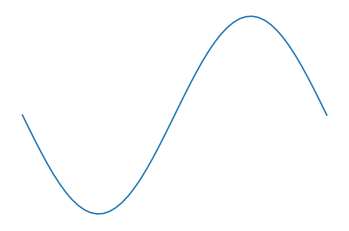

In [2]:
x = np.linspace(-1,1)
f = lambda x: # EDIT HERE

plt.plot(x,f(x));
plt.axis('off');

Now, generate a **data set of size $N = 2$** by sampling $x$ uniformly in $[-1, 1]$ to generate a $(x_1, y_1), (x_,y_2)$. Use your solution to HW0!

In [ ]:
# EDIT HERE
dataX = 
dataY = 

Plot them along with the function:

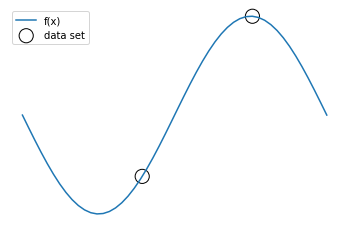

In [3]:
plt.plot(x,f(x),label='f(x)');
plt.scatter(dataX,dataY,label='data set',color='black',facecolor='none',s=200);
plt.legend();plt.axis('off');

In the remainder of the problem, we will fit this data using one of two models: 

$$
\begin{align}
\mathcal{H}_0 &: \text{Set of all lines of the form } h(x) = b\\
\mathcal{H}_1 &:  \text{Set of all lines of the form } h(x) = ax + b
\end{align}
$$

and compare their behavior.

# Best Constant/"Flat" Line

Lets begin $\mathcal{H}_0$. This is the **constant** hypothesis that best fits the data. Just from basic reasoning, what do you think it will be? Can you write down a closed form solution?

The constant that best fit the data is h(x) = b such that b is the mean of the Y values

Now, try and plot your answer, with the function above

In [4]:
myConstant = # EDIT HERE

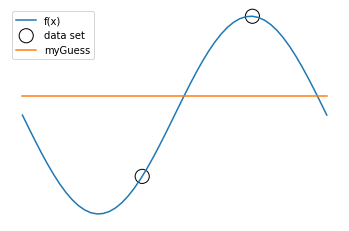

In [5]:
plt.plot(x,f(x),label='f(x)');
plt.scatter(dataX,dataY,label='data set',color='black',facecolor='none',s=200);
plt.plot(x,np.ones_like(x)*myConstant,label='myGuess');
plt.axis('off');plt.legend();


We can also have `numpy` calculate the best $0th$-order (constant) polynomial, and plot it along with your guess:

In [6]:
bestConstantFunction = np.polyfit(dataX, dataY, deg = 0) 

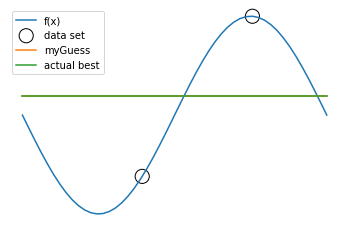

In [7]:
plt.plot(x,f(x),label='f(x)');
plt.scatter(dataX,dataY,label='data set',color='black',facecolor='none',s=200);

# plot your best guess
plt.plot(x,np.ones_like(x)*myConstant,label='myGuess');

# plot the actual best constant
plt.plot(x,np.ones_like(x)*bestConstantFunction,label='actual best');

plt.axis('off');plt.legend();

Your guess and the actual one should be overlapping. 

# Best Line

For $\mathcal{H}_1$, what do you think it would be? Can you write down a closed form answer?

The best guess is the line that goes through the two points $(x_1, y_1)$ and $(x_2, y_2)$. Specifically, the best line is given by: $y - y_1 = m(x - x_1)$ where $m = \frac{y_2 - y_1}{x_2 - x_1}$. Thus, we have
$$y = y_1 -  \left(\frac{y_2 - y_1}{x_2 - x_1}\right)x_1 + \left(\frac{y_2 - y_1}{x_2 - x_1}\right)x$$

As above, plot your answer with the actual function:

In [8]:
mySlope = #  EDIT HERE
myIntercept = # EDIT HERE
myLine = lambda x: # EDIT HERE

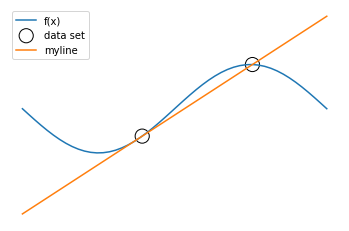

In [9]:
plt.plot(x,f(x),label='f(x)');
plt.scatter(dataX,dataY,label='data set',color='black',facecolor='none',s=200);

plt.plot(x,myLine(x),label='myline');
plt.axis('off');plt.legend();

As above, lets compare this `numpy`s calculation:

In [10]:
coefs = np.polyfit(dataX, dataY, deg = 1) 
bestLine = np.poly1d(coefs)

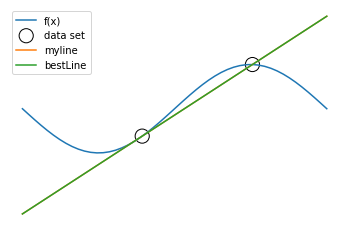

In [11]:
plt.plot(x,f(x),label='f(x)');
plt.scatter(dataX,dataY,label='data set',color='black',facecolor='none',s=200);
plt.plot(x,myLine(x),label='myline');
plt.plot(x, bestLine(x),label='bestLine');
plt.axis('off');plt.legend();

As before, they should be overlapping.

# Which one does better?

Before we continue with the actual analysis of *learning* with these hypothesis classes, lets just see which one a priori does a better job **approximating** $f$.

Using `numpy`'s `polyfit` as we did above, find the best constant and line that fits *the entire function $f$ over $[-1,1]$. 

Lets begin with $\mathcal{H}_0$:

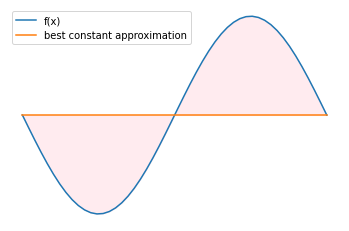

In [12]:
coefs = np.polyfit(x, f(x), deg = 0) 
bestApproxConstant = np.poly1d(coefs)
plt.plot(x,f(x),label='f(x)');
plt.plot(x,bestApproxConstant(x),label='best constant approximation');
plt.fill_between(x,f(x),bestApproxConstant(x),color='pink',alpha=0.3)
plt.axis('off');plt.legend();

Calculate the average total approximation error:

$$
E_{approx}(x) = (bestApproxContant(x) - f(x))^2\\
E_{approx} = \mathbb{E}_x [E_{approx}(x)]
$$

In [13]:
approxError = # EDIT HERE
print("The average approximation error is:",approxError)

The average approximation error is: 0.49000000000000005


Now for the best linear approximation:

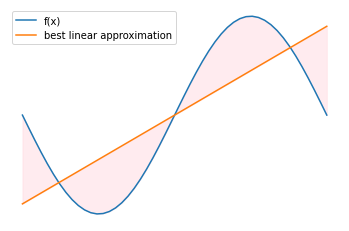

In [14]:
coefs = np.polyfit(x, f(x), deg = 1) 
bestApproxLine = np.poly1d(coefs)

plt.plot(x,f(x),label='f(x)');
plt.plot(x,bestApproxLine(x),label='best linear approximation');
plt.fill_between(x,f(x),bestApproxLine(x),color='pink',alpha=0.3)
plt.axis('off');plt.legend();

As above, calculate the average approximation error

In [15]:
approxError = # EDIT HERE
print("The average approximation error is:",approxError)

The average approximation error is: 0.2102898187183413


What do you conclude? 

# Lets Repeat this experiment!

Now we get to the good stuff! We're going to repeat this process with **many data sets** so that we can estimate the **bias** and the **variance** induced by each Hypothesis class.

Lets begin by writing code to let us:

* generate many random datasets of size $N=2$
* uses `numpy` to calculate the best **constant** *and* **linear** hypotheses using **each** dataset
* plot each guess, and the **average** guess belonging to each hypothesis class.

Phew! Lets take it one step at a time. Lets first set the number of experiments we want to run to $100$.

In [16]:
numExperiments = 100
numPoints = 2

Now lets actually run the experiments

In [17]:
bestConstantList = []
bestLineList = []
bestPolyList = []

for i in range(numExperiments):
    
    # generate the dataset
    currentXs = # EDIT HERE
    currentYs = # EDIT HERE
    
    # calculate the best constant for this data set
    bestConstant = np.poly1d(np.polyfit(currentXs, currentYs, deg = 0))
    
    # calculate the best line for this data set
    bestLine = np.poly1d(np.polyfit(currentXs, currentYs, deg = 1))
    
    # calculate the best poly for this data set
    bestPoly = np.poly1d(np.polyfit(currentXs, currentYs, deg = 10))
    
    
    # now lets evaluate these functions, and store them for plotting later:
    bestConstantY = bestConstant(x)
    bestLineY = bestLine(x)
    bestPolyY = bestPoly(x)
    
    # store them in our list for later use:
    bestConstantList.append(bestConstantY)
    bestLineList.append(bestLineY)
    bestPolyList.append(bestPolyY)

Lets make sure we now have two arrays/matrices:

* one which stores the bestConstants we calcualte for each dataset
* one which stores the bestLine we calcualte for each dataset

Each should be of size: `numExperiments,lengthOfX`:

In [18]:
# Now lets turn those lists to arrays for convenience:
bestConstantArray = np.asarray(bestConstantList)
bestLineArray = np.asarray(bestLineList)
bestPolyArray = np.asarray(bestPolyList)

Verify their shapes:

In [19]:
print(bestConstantArray.shape)
print(bestLineArray.shape)
print(bestPolyArray.shape)

(100, 50)
(100, 50)
(100, 50)


Lets now plot the results of our experiment. For this, we can use `seaborn`'s **very** handy `tsplot` command:

`tsplot` can help us automagically plot the standard deviation and mean of each of our experiments. 

If we first focus on $\mathcal{H_0}$:

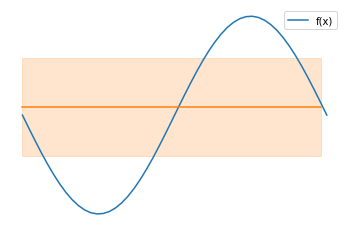

In [20]:
plt.plot(x,f(x),label='f(x)');
plt.axis('off')
df = pd.DataFrame(bestConstantArray).melt()
df['variable'] = df['variable']/25-1
sns.lineplot(x="variable", y="value", data=df, ci='sd');

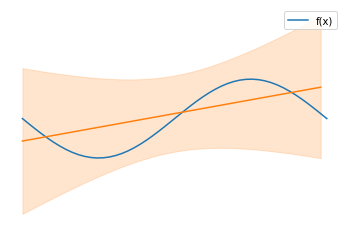

In [21]:
plt.plot(x,f(x),label='f(x)');
plt.axis('off')
df = pd.DataFrame(bestLineArray).melt()
df['variable'] = df['variable']/25-1
sns.lineplot(x="variable", y="value", data=df, ci='sd');

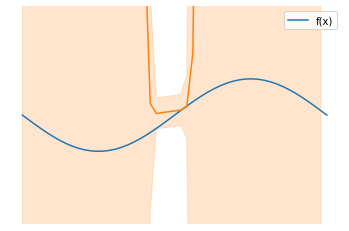

In [22]:
plt.plot(x,f(x),label='f(x)');
plt.axis('off');plt.ylim(-3,3)
df = pd.DataFrame(bestPolyArray).melt()
df['variable'] = df['variable']/25-1
sns.lineplot(x="variable", y="value", data=df, ci='sd');

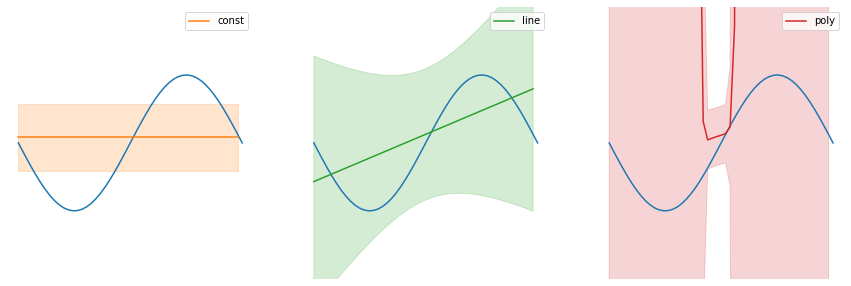

In [23]:
ci = 'sd'
fig,axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))

for ax,arr,col,label in zip(axes,[bestConstantArray,bestLineArray,bestPolyArray],colors[1:],['const','line','poly']):
    ax.plot(x,f(x));
    df = pd.DataFrame(arr).melt()
    df['variable'] = df['variable']/25-1
    sns.lineplot(x="variable", y="value", data=df, ci=ci,ax=ax, color=col,label=label);
    ax.axis('off')
    ax.set_ylim(-2,2)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
def experiment(numPoints=2,poly_order=10,numExperiments=100,alpha=0.1):
    bestConstantList = []
    bestLineList = []
    bestPolyList = []

    for i in range(numExperiments):

        # generate the dataset
        currentXs = # EDIT HERE
        X = currentXs.reshape(-1,1)
        xx = x.reshape(-1,1)
        currentYs = # EDIT HERE
        y = currentYs

        # calculate the best constant for this data set
        bestConstant = np.poly1d(np.polyfit(currentXs, currentYs, deg = 0))

        # calculate the best line for this data set
        ridge=linear_model.Ridge(alpha=alpha)
        bestLine = ridge.fit(X,y).predict(xx)

        # calculate the best poly for this data set
        poly = PolynomialFeatures(degree=poly_order, include_bias=False)
        poly_features = poly.fit_transform(X)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y)
        bestPoly = poly_reg_model.predict(poly.fit_transform(xx))


        # now lets evaluate these functions, and store them for plotting later:
        bestConstantY = bestConstant(x)

        # store them in our list for later use:
        bestConstantList.append(bestConstantY)
        bestLineList.append(bestLine)
        bestPolyList.append(bestPoly)
        
    
    return bestConstantList,bestLineList,bestPolyList

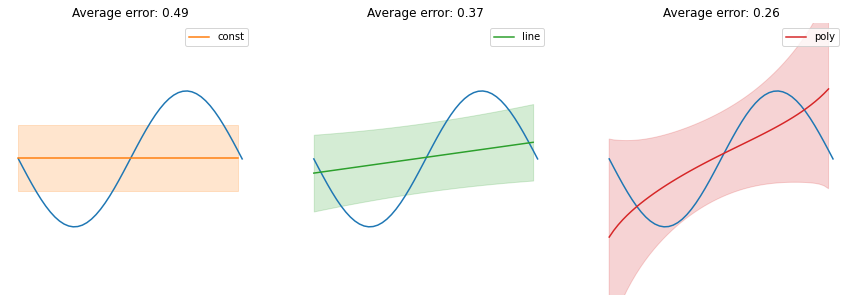

In [25]:
# parameters
numPoints=2
poly_order=20
alpha=1

# create figure
fig,axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))
for ax,arr,col,label in zip(axes,experiment(numPoints,poly_order,alpha=alpha),colors[1:],['const','line','poly']):
    ax.plot(x,f(x));
    df = pd.DataFrame(arr).melt()
    mean_hyp = np.asarray(arr).mean(axis=0)
    error = np.mean((f(x) - mean_hyp)**2)
    df['variable'] = df['variable']/25-1
    sns.lineplot(x="variable", y="value", data=df, ci='sd',ax=ax, color=col,label=label);
    ax.axis('off');ax.set_ylim(-2,2)
    ax.set_title(f'Average error: {error:.2f}')

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Play around with the above! Discuss with each other and in class. What do you observe? Write down some observations below! 

</div>

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def experiment2(numPoints=2,numExperiments=100,alpha=0.1):
    bestLineList = []

    for i in range(numExperiments):

        # generate the dataset
        currentXs = np.random.rand(numPoints)*2-1
        X = currentXs.reshape(-1,1)
        xx = x.reshape(-1,1)
        currentYs = f(currentXs)
        y = currentYs


        # calculate the best line for this data set
        ridge=linear_model.Ridge(alpha=alpha)
        bestLine = ridge.fit(X,y).predict(xx)


        # store them in our list for later use:
        bestLineList.append(bestLine)
        
    
    return bestLineList

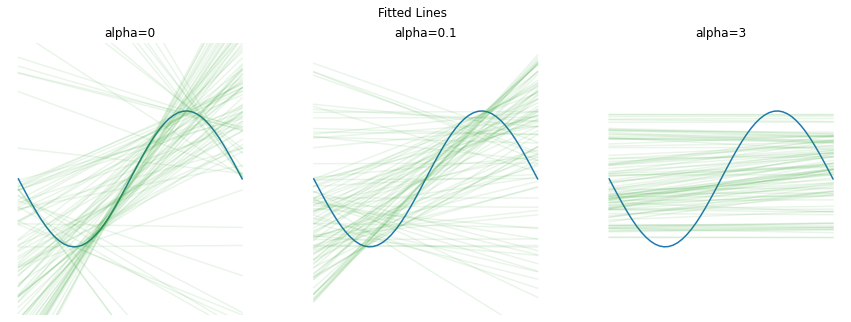

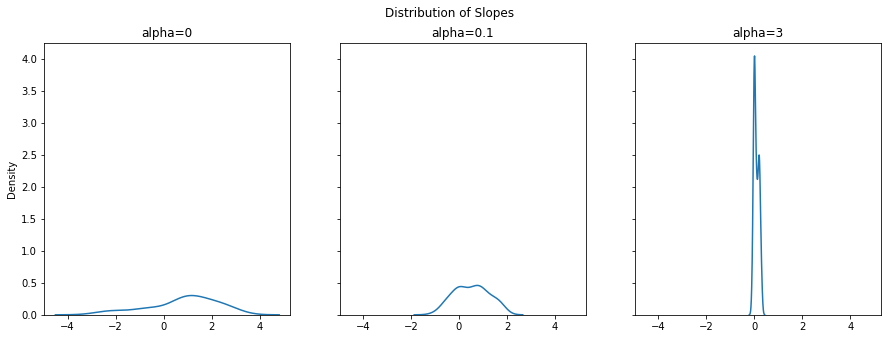

In [32]:
# create figure
numPoints = 2
alphas = [0,1e-1,3]
fig,axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))
fig.suptitle('Fitted Lines')
slope_list = []
for ax,alpha in zip(axes,alphas):
    ax.plot(x,f(x));
    lines = np.array(experiment2(numPoints=numPoints,alpha=alpha)).T
    slopes = (lines[-1,:]-lines[0,:])/2
    slope_list.append(slopes)
    ax.set_title(f'alpha={alpha}')
    ax.plot(x,lines,alpha=0.1,color=colors[2])
    ax.axis('off');ax.set_ylim(-2,2)

fig,axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))
fig.suptitle('Distribution of Slopes')
for ax,slopes,alpha in zip(axes,slope_list,alphas):
    sns.kdeplot(x=slopes,ax=ax,)
    ax.set_title(f'alpha={alpha}')